# Mean
$\bar{x}_{\mathrm{arithm}} = \frac{1}{n} \sum_{i=1}^n{x_i} = \frac{x_1 + x_2 + \dotsb + x_n}{n}$

Calculation of the mean value is very susceptible to outliers. Hence, one should be careful if statistics report only the mean.

# Median

$x = (x_0, \cdots, x_{n-1}) \wedge x_i \leq x_{i+1}$

$\tilde x = x_\frac{n}{2};\; n\text{ odd}\\
 \tilde x= \frac {1}{2}\left(x_{\frac{n}{2}-1} + x_{\frac{n}{2}}\right);\; n \text{ even }
$

$\tilde x_u = x_{\left\lfloor\frac{n}{2}\right\rfloor}\\
\tilde x_o = x_{\left\lceil\frac{n}{2}\right\rceil}\\
\tilde x = \tfrac 12\left(\tilde x_u + \tilde x_o\right)$

The Median is far less susceptible to outliers. But it requires sorting of the complete data which in large datasets can be high effort.

# Example
Economical statistics often report either the average (= Mean) income of households or the median (Depending on who is creating the statistics). Example: [Mittleres Einkommen]("https://de.wikipedia.org/wiki/Mittleres_Einkommen") and [average wage]("https://en.wikipedia.org/wiki/List_of_countries_by_average_wage")

<img src="./main-qimg-130ec68f24d8dfcb669f7ae584f88535.png" alt="img" width="600px"/>

Let's assume, we are interviewing a neighbourhood of a small town and collect the average income per month and household. We interview 2000 households and find that the richest household has 5000 credits/month.

In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt


def applicator(x, what, p0 = 1,  p1=  0):
    return distributions[what](p1, p1)

def createDistribution(what, p0 = 1,  p1=  0, shape = (1, 100), scale = 1):
    res = np.zeros(shape)
    res = np.apply_along_axis(applicator, 0, res, what, p0, p1)
    res = res*scale
    return res

def visualizeData(data, mean, median, bins=100):
    plt.figure(figsize=(16,10))
    plt.hist(data, bins = bins)
    plt.axvline(mean, color='r')
    plt.axvline(median, color='g')
    plt.show()
    plt.boxplot(data)
    plt.show()


    
seed = 42
rnd.seed(seed)
distributions = {
                    "uniform"   : rnd.uniform, 
                    "normal"    : rnd.gauss, 
                    "beta"      : rnd.betavariate, 
                    "lognorm"   : rnd.lognormvariate
                }

To cover the range from 0 credits to 5000 credits, we apply a beta distribution. Beta distribution reflects that there will be a center where we can find many similar incomes and left and right wings with smaller incomes

Mean =  2514.848731918645 Median =  2493.0431339053334


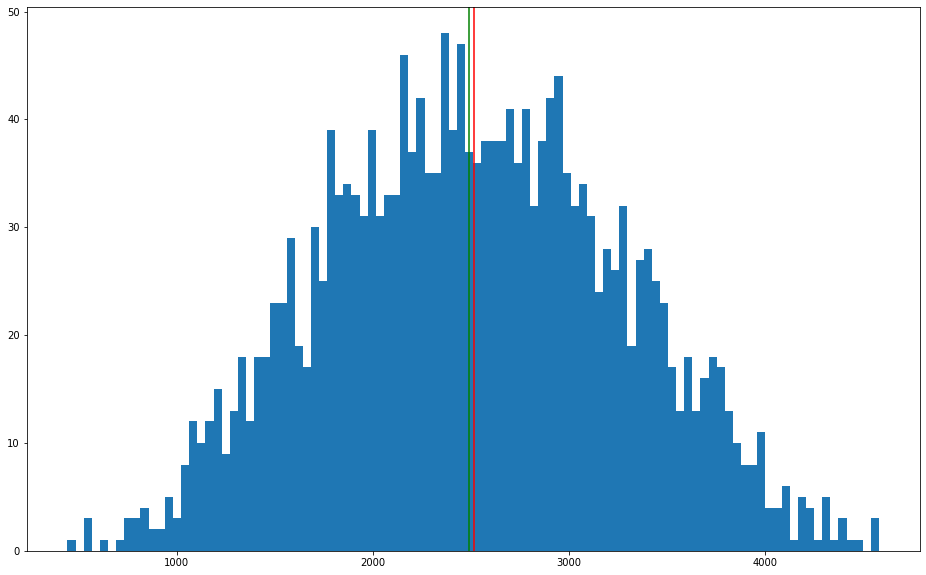

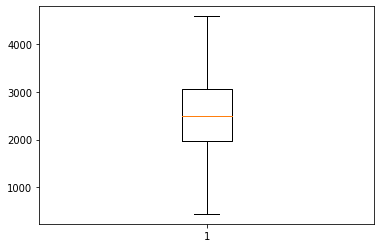

In [2]:
res = createDistribution("beta", p0 = 0, p1 = 5, shape = (1, 2000), scale=5000)
mean = res.mean()
median = np.median(res)
print("Mean = ", mean, "Median = ", median)
visualizeData(res, mean, median)

## Observation:
From the images we see, that mean and median are nearly the same. There are no outliers reported (as we can see from the boxplot. 

## A different scenario
Now we add a two housholds by replacing the richest two (5000 credits), with two that have 500 times more (e.g. all other households have rented appartments, these households owns the real estate):

Mean =  3769.619915105288 Median =  2494.5868946553283


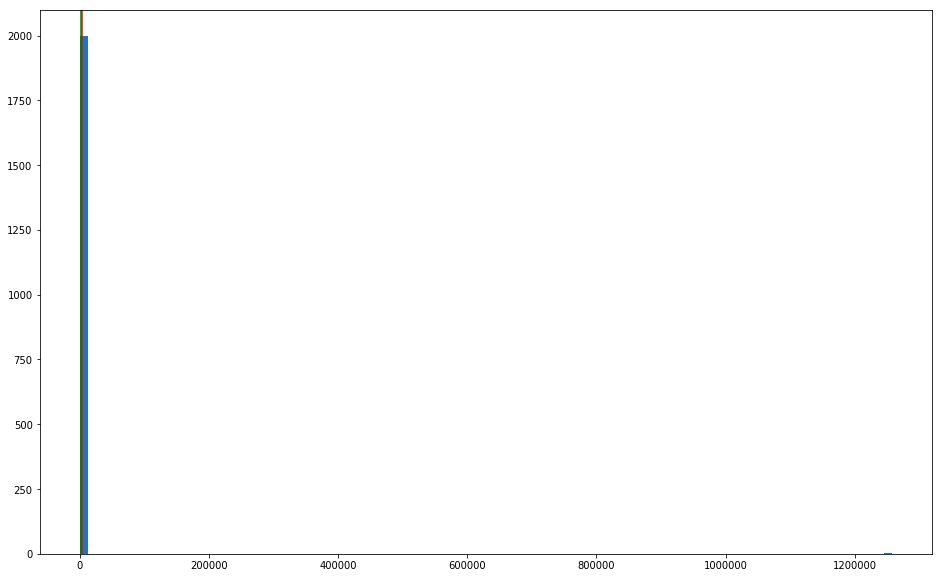

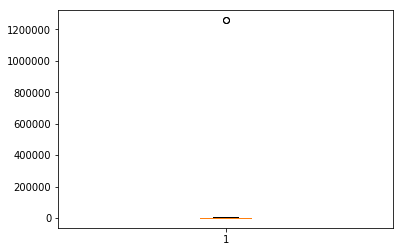

In [19]:
res1 = res.copy()
res1[-1] = 500*mean
res1[-2] = 500*mean
mean = res1.mean()
median = np.median(res1)
print("Mean = ", mean, "Median = ", median)
visualizeData(res1, mean, median)

In the boxplot we can now see a two heavy outliers. Note, that if the definition of poverty would refer to the mean (it refers to the median, see https://de.wikipedia.org/wiki/Armutsgrenze) the complete town, except for the two households would live at the edge of poverty.

# Expectation Value

$\operatorname{E}(X)=\sum_{i\in I} x_i p_i=\sum_{i \in I} x_i P(X=x_i)$

For the above distributions the expectation values would be 

In [20]:
def expectedValue(data):
    weights = (data/data.sum())
    res = np.inner(data, weights)
    
    return res.mean()

In [21]:
print(expectedValue(res))
print(expectedValue(res1))

2741.1161791902623
421263.10723381233


We see, that the outliers highly influence the expected value.

# Standard Deviation
$\operatorname{Var}(X) = \sigma^2 = \frac{1}{N} \sum \limits_{i=1}^N(x_i-\operatorname{E}(X))^2\\
\operatorname{\sigma}(X) = \sqrt{\operatorname{Var}(X)}$

In [22]:
print(res.std())
print(res1.std())

754.3397131568076
39671.044405502544


# Median Absolute Deviation
The MAD is an alternative to the standard deviation which, similar to the relation between mean and median is also less susceptible agains outliers.

$\operatorname{MAD}(x) = \operatorname{median}\left(\left|x_{i} - \operatorname{median} (x) \right|\right)$

In [23]:
def mad(data):
    t = data-np.median(data)
    t = np.abs(t)
    return np.median(t)

In [24]:
print(mad(res))
print(mad(res1))

545.4658334765022
545.9316749805691
